# Data Cleaning

In [1]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
from matplotlib import pyplot
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from math import exp
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'simple_white'

# Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# Import data 
data = pd.read_csv('data/owid-co2-data.csv')
df = data

# Observe data shape and head
print(df.shape)
df.head()

(24016, 38)


,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.000,NaN,NaN,NaN,0.0,0.015,0.0,0.0,0.000,0.0,0.002,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.001,0.004,NaN,NaN,0.0,0.022,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.001,0.005,NaN,NaN,0.0,0.026,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.001,0.004,NaN,NaN,0.0,0.033,0.0,0.0,0.062,0.0,0.004,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.001,0.005,NaN,NaN,0.0,0.037,0.0,0.0,0.066,0.0,0.005,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [3]:
# Only include data from 1950 and later
df = df[df['year']>=1950]

# Observe new df shape
df.shape

(16008, 38)

In [4]:
# Drop columns with >8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)

#Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)

#Drop "World" entries
df = df[df.country != 'World']

#Observe new df shape
df.shape

(14404, 19)

# Exploratory Data Analysis (EDA)

In [7]:
# df_usa = data[data['country'] == 'United States']
# df_usa = df_usa[df_usa['year'] >= 1800]
# df_usa = df_usa[['year','co2']]
# df_usa.set_index('year', inplace=True)

# # Convert year to DateTime object
# df_usa.index = pd.to_datetime(df_usa.index,format='%Y')

# df_usa.head()

,co2
year,
1800-01-01,0.253
1801-01-01,0.267
1802-01-01,0.289
1803-01-01,0.297
1804-01-01,0.333


In [8]:
# ## EDIT
# df_world = data[data['country'] == 'World']
# df_world = df_world[df_world['year'] >= 1800]
# df_world = df_world[['year','co2']]
# df_world.set_index('year', inplace=True)

# # Convert year to DateTime object
# df_world.index = pd.to_datetime(df_world.index,format='%Y')

# # Sanity Check
# # df_world.head()

,co2
year,
1800-01-01,28.092
1801-01-01,27.960
1802-01-01,36.783
1803-01-01,31.488
1804-01-01,34.310


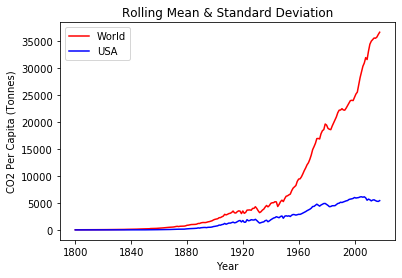

In [71]:
# ## EDIT: comparing world with US - CHANGE TO PLOTLY
# plt.plot(df_world, color='red', label='World')
# plt.plot(df_usa,color='blue', label='USA')

# plt.legend(loc='best')

# plt.title('Rolling Mean & Standard Deviation')
# plt.xlabel('Year')
# plt.ylabel('CO2 Per Capita (Tonnes)')
# plt.show(block=False)

In [125]:
# ## FLOATING WORDS

# import plotly.graph_objects as go

# fig = go.Figure()

# # Create scatter trace of text labels
# fig.add_trace(go.Scatter(
#     x=[2, 3.5, 6],
#     y=[1, 1.5, 1],
#     text=["Vertical Line",
#           "Horizontal Dashed Line",
#           "Diagonal dotted Line"],
#     mode="text",
# ))

# # Set axes ranges
# fig.update_xaxes(range=[0, 7])
# fig.update_yaxes(range=[0, 2.5])

In [126]:
# # Add lines
# # vertical solid
# fig.add_shape(type="line",
#     x0=1, y0=0, x1=1, y1=2,
#     line=dict(color="RoyalBlue",width=3)
# )

# # horizontal dashed line
# fig.add_shape(type="line",
#     x0=2, y0=2, x1=5, y1=2,
#     line=dict(
#         color="LightSeaGreen",
#         width=4,
#         dash="dashdot",
#     )
# )

# #diagonal dotted
# fig.add_shape(type="line",
#     x0=4, y0=0, x1=6, y1=2,
#     line=dict(
#         color="MediumPurple",
#         width=4,
#         dash="dot",
#     )
# )
# fig.update_shapes(dict(xref='x', yref='y'))
# fig.show()

In [411]:
pio.templates.default = 'plotly_white'

In [421]:
## EDIT
#from plotly.subplots import make_subplots

# Create subset to compare CO2 Emissions (World vs US)
df_world_us = data[data['country'].isin(['World','United States'])]
df_world_us = df_world_us[df_world_us['year'] >= 1850]

# Plot
fig = px.line(df_world_us, x='year', y='co2', 
              color='country', 
              title='Total CO2 Emissions: World vs. United States', 
              labels = {'year': 'Year', 'co2': 'Total CO2 Emissions'
                      })
# Adding thresholds
fig.add_shape(type="line",
    x0=1929, y0=0, x1=1929, y1=8000,
    line=dict(color="Blue",
              width=2, dash='dot'))

fig.add_shape(type="line",
    x0=1945, y0=0, x1=1945, y1=13000,
    line=dict(color="Blue",
              width=2, dash='dot'))

fig.add_shape(type="line",
    x0=1950, y0=0, x1=1950, y1=18000,
    line=dict(color="Blue",
              width=2, dash='dot'))

fig.add_shape(type="line",
    x0=1975, y0=0, x1=1975, y1=26000,
    line=dict(color="Blue",
              width=2, dash='dot'))

fig.add_shape(type="line",
    x0=2008, y0=0, x1=2008, y1=35000,
    line=dict(color="Blue",
              width=2, dash='dot'))

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=[1923,1923, 1936, 1950,1950, 1975,1975, 2002,2002],
    y=[10000,8000, 14500, 22000,20000, 30000,28000, 37000,35000],
    text=['Stock Market Crash','of 1929',
          'World War II ends',
          '"Golden Age" of', 'air travel begins',
          'the term "Global Warming"','is popularized in the US', 
          'Stock Market Crash','of 2008'], 
    mode="text"))

#pio.templates.default = 'plotly_white'
fig.show()

# Uncomment below code to save plot
# fig.write_html("images/CO2_world_vs_us.html")

## Top 50 CO2 Emitters

**Add dotted line after Indonesia**

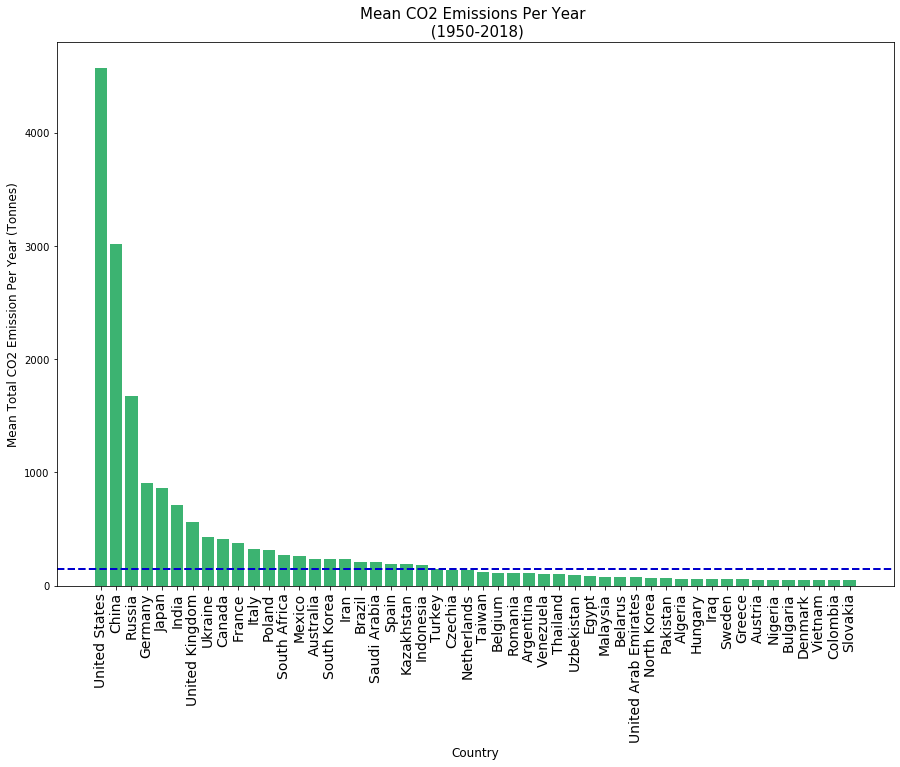

<Figure size 432x288 with 0 Axes>

In [343]:
# Visualize top 50 total CO2 emissions by country
top50 = df.groupby(['country'])['co2'].mean().sort_values(ascending=False).index[:50]
height = df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50]

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x=top50 , height=height, color = 'mediumseagreen')

plt.xlabel('Country', fontsize=12)
plt.title("Mean CO2 Emissions Per Year \n (1950-2018)", fontsize=15)
plt.ylabel('Mean Total CO2 Emission Per Year (Tonnes)', fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')

# Threshold to indicate countries above 150 mean tonnes
threshold = 150
plt.axhline(y=threshold,linewidth=2, linestyle='dashed', color='mediumblue')

plt.show()

#plt.savefig("images/mean_emissions_per_year_top50")

In [153]:
# How does each country contribute to total CO2 emissions?

names = df.country.unique()
values = df.groupby(['country'])['share_global_co2'].mean()

#Visualize top CO2 contributers 
fig = px.pie(df, values=values, names=names,
      title = 'CO2 Emissions by Country')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

pio.templates.default = 'simple_white'

fig.show()

#fig.write_html("images/CO2_percentage.html")

# EXTRA EDIT: ADD MAP HERE (stretch)

## Top 10 CO2 Emitters Per Capita

In [22]:
# df.groupby(['country'])['co2'].mean()

country
Afghanistan                   2.563333
Albania                       3.906043
Algeria                      61.598406
Andorra                       0.486103
Angola                        9.658725
                               ...    
Vietnam                      46.944522
Wallis and Futuna Islands     0.025389
Yemen                         8.766116
Zambia                        3.218817
Zimbabwe                     10.412833
Name: co2, Length: 221, dtype: float64

In [9]:
top50

Index(['United States', 'China', 'Russia', 'Germany', 'Japan', 'India',
       'United Kingdom', 'Ukraine', 'Canada', 'France', 'Italy', 'Poland',
       'South Africa', 'Mexico', 'Australia', 'South Korea', 'Iran', 'Brazil',
       'Saudi Arabia', 'Spain', 'Kazakhstan', 'Indonesia', 'Turkey', 'Czechia',
       'Netherlands', 'Taiwan', 'Belgium', 'Romania', 'Argentina', 'Venezuela',
       'Thailand', 'Uzbekistan', 'Egypt', 'Malaysia', 'Belarus',
       'United Arab Emirates', 'North Korea', 'Pakistan', 'Algeria', 'Hungary',
       'Iraq', 'Sweden', 'Greece', 'Austria', 'Nigeria', 'Bulgaria', 'Denmark',
       'Vietnam', 'Colombia', 'Slovakia'],
      dtype='object', name='country')

In [12]:
df_top_co2 = df.loc[df['country'].isin(top50)]
df_top_co2.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,cement_co2,coal_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,population,gdp
464,DZA,Algeria,1950,3.785,316.532,2.876,0.427,0.065,11.087,0.007,NaN,0.161,1.883,1.740,0.018,0.212,0.196,8872000.0,NaN
465,DZA,Algeria,1951,4.133,9.197,0.348,0.458,0.066,15.220,0.009,NaN,0.224,2.041,1.869,0.025,0.226,0.207,9023000.0,NaN
466,DZA,Algeria,1952,3.891,-5.851,-0.242,0.424,0.062,19.111,0.011,NaN,0.242,1.843,1.806,0.026,0.201,0.197,9186000.0,NaN
467,DZA,Algeria,1953,4.001,2.825,0.110,0.427,0.062,23.113,0.013,NaN,0.256,1.546,2.195,0.027,0.165,0.234,9364000.0,NaN
468,DZA,Algeria,1954,4.155,3.846,0.154,0.435,0.063,27.267,0.015,NaN,0.330,1.484,2.341,0.034,0.155,0.245,9560000.0,NaN


In [43]:
df_top_co2.country.value_counts()

United Kingdom    69
Japan             69
United States     69
Brazil            69
India             69
Mexico            69
Saudi Arabia      69
France            69
Italy             69
Germany           69
Canada            69
South Korea       69
Iran              69
China             69
Spain             69
Australia         69
Poland            69
Indonesia         69
South Africa      69
Ukraine           60
Russia            60
Kazakhstan        60
Name: country, dtype: int64

In [19]:
df.groupby(['country'])['co2'].mean()
#df_top_co2 = df.loc[df['country'].isin(top_co2)]

country
Algeria                  153.214500
Argentina                185.635267
Australia                302.905125
Brazil                   292.475795
Canada                   408.196348
China                   3199.471615
Czechia                  176.521048
Egypt                    208.055286
France                   380.734435
Germany                  907.555435
India                    853.997821
Indonesia                350.524862
Iran                     385.510595
Iraq                     175.326143
Italy                    379.540893
Japan                    931.994254
Kazakhstan               219.239786
Malaysia                 211.129688
Mexico                   365.629711
Netherlands              169.733780
North Korea              186.583500
Pakistan                 177.697500
Poland                   330.139844
Romania                  190.300765
Russia                  1678.672633
Saudi Arabia             340.313821
South Africa             347.723458
South Korea         

In [ ]:
## threshold of 150 HERE!

In [63]:
lst_top10 = df_top10.country.value_counts().index
lst_top10

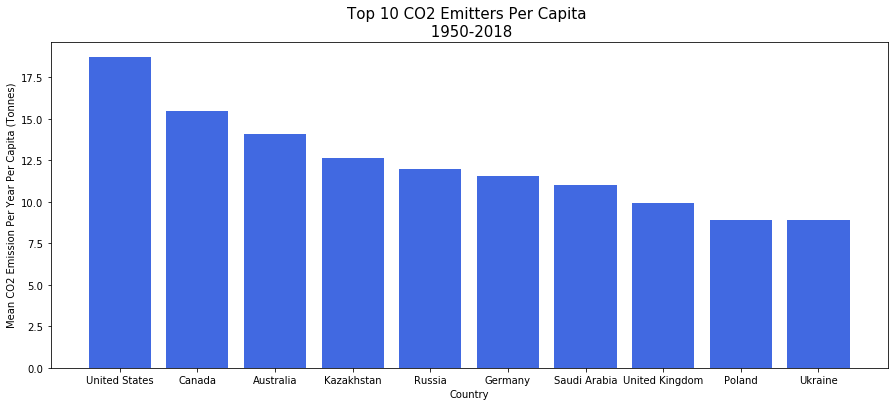

In [337]:
## EDIT 

# Find top 10 CO2 emitters per capita,
# countries that emit more than an average of 150 tonnes per year per capita

# Create list of top 10 emitters
top_co2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:22].index)
df_top_co2 = df.loc[df['country'].isin(top_co2)]
top10_percapita = list(df_top_co2.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)[:10].index)

# Plot data
df_top10 = df.loc[df['country'].isin(top10_percapita)]
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x = top10_percapita,
        height = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False),
       color = 'royalblue')

plt.title('Top 10 CO2 Emitters Per Capita \n 1950-2018', fontsize=15)
plt.ylabel('Mean CO2 Emission Per Year Per Capita (Tonnes)')
plt.xlabel('Country')

# Uncomment below code only to save plot
#plt.savefig("images/top10_per_capita.png")


# STOPPED HERE

# Time Series Model for USA

## Data Cleaning for USA

We focused on post-1950 data for our global EDA above since some countries are missing significant data before that time. For our modeling process, however, which focuses on the United States, we included all data for that country, which begins in 1800. We will be predicting the United States's CO2 emissions per capita.

In [345]:
# Reload original df to get pre-1950 USA data
df_USA = data

# Only include USA co2_per_capita data post-1800
df_USA = df_USA[df_USA['year'] >= 1800]
df_USA = df_USA[df_USA['country'] == 'United States']
df_USA = df_USA[['year','co2_per_capita']]

# Observe shape of reformatted df
print(df_USA.shape)

(219, 2)


In [346]:
# Convert year to DateTime object
df_USA['year'] = pd.to_datetime(df_USA['year'],format='%Y')

# Convert year to index
df_USA.set_index('year', inplace=True)

# Observe updated df
df_USA.head()

,co2_per_capita
year,
1800-01-01,0.037
1801-01-01,0.039
1802-01-01,0.041
1803-01-01,0.041
1804-01-01,0.045


In [347]:
fig =px.scatter(x=range(10), y=range(10))


## EDA for USA

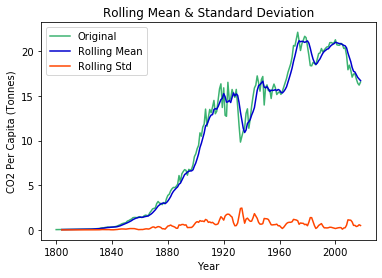

In [374]:
# Visualize USA's CO2 emissions per capita since 1800,
# including 5-year rolling mean and rolling standard deviation

roll_mean = df_USA.rolling(window=5, center=False).mean()
roll_std = df_USA.rolling(window=5, center=False).std()

plt.plot(df_USA,color='mediumseagreen', label='Original')
plt.plot(roll_mean, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita (Tonnes)')
plt.show(block=False)

The above data does not look stationary, but we will perform a Dickey-Fuller test to confirm.

In [11]:
# Dickey-Fuller test
test = adfuller(df_USA['co2_per_capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput


Test Statistic                  -1.057110
p-value                          0.731869
#Lags Used                      12.000000
Number of Observations Used    204.000000
dtype: float64

As expected, with a p value of 0.73, we cannot reject the null hypothesis that this data is un-stationary. We will remedy this below before fitting our model.

## Addressing Trends and Stationarity

In [17]:
df_top_co2.country.value_counts()

Germany                 69
Canada                  69
United States           69
United Kingdom          69
France                  69
China                   65
Poland                  64
Japan                   63
Ukraine                 60
Russia                  60
Italy                   56
India                   56
South Africa            48
Australia               48
Spain                   46
Mexico                  45
Brazil                  44
Kazakhstan              42
Netherlands             41
Saudi Arabia            39
Iran                    37
South Korea             36
Turkey                  29
Indonesia               29
Taiwan                  26
Thailand                24
Czechia                 21
Venezuela               20
Romania                 17
Malaysia                16
Argentina               15
Egypt                   14
Pakistan                12
United Arab Emirates    11
Iraq                     7
Vietnam                  5
North Korea              4
A

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,cement_co2,coal_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,population,gdp
464,DZA,Algeria,1950,3.785,316.532,2.876,0.427,0.065,11.087,0.007,NaN,0.161,1.883,1.740,0.018,0.212,0.196,8872000.0,NaN
465,DZA,Algeria,1951,4.133,9.197,0.348,0.458,0.066,15.220,0.009,NaN,0.224,2.041,1.869,0.025,0.226,0.207,9023000.0,NaN
466,DZA,Algeria,1952,3.891,-5.851,-0.242,0.424,0.062,19.111,0.011,NaN,0.242,1.843,1.806,0.026,0.201,0.197,9186000.0,NaN
467,DZA,Algeria,1953,4.001,2.825,0.110,0.427,0.062,23.113,0.013,NaN,0.256,1.546,2.195,0.027,0.165,0.234,9364000.0,NaN
468,DZA,Algeria,1954,4.155,3.846,0.154,0.435,0.063,27.267,0.015,NaN,0.330,1.484,2.341,0.034,0.155,0.245,9560000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23330,VNM,Vietnam,2014,160.082,13.987,19.643,1.745,0.451,2623.013,0.182,0.316,30.151,70.517,46.511,0.329,0.769,0.507,91714000.0,5.070000e+11
23331,VNM,Vietnam,2015,180.306,12.634,20.224,1.946,0.508,2803.319,0.190,0.333,NaN,NaN,NaN,NaN,NaN,NaN,92677000.0,5.410000e+11
23332,VNM,Vietnam,2016,183.491,1.766,3.185,1.960,0.514,2986.810,0.198,0.319,NaN,NaN,NaN,NaN,NaN,NaN,93640000.0,5.750000e+11
23333,VNM,Vietnam,2017,184.727,0.674,1.236,1.953,0.511,3171.537,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94601000.0,NaN


### Log Transformation

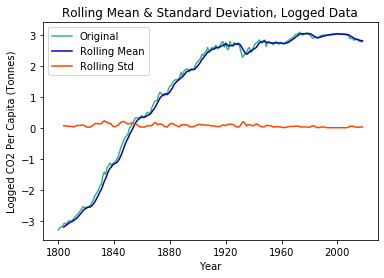

In [376]:
##EDIT

# Log transformation to address lack of variance and covariance
# Create new df that contains the logged values of the original one
log_USA = log(df_USA)

# Visualize logged data, including 5-year rolling mean and standard deviation
roll_mean_log = log_USA.rolling(window=5, center=False).mean()
roll_std_log = log_USA.rolling(window=5, center=False).std()

plt.plot(log_USA,color='mediumseagreen', label='Original')
plt.plot(roll_mean_log, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std_log, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation, Logged Data')
plt.xlabel('Year')
plt.ylabel('Logged CO2 Per Capita (Tonnes)')
plt.show(block=False)

This logged data looks more stationary in regards to constant variance and covariance, but not in regards to a constant mean. We will perform a Dickey-Fuller test to test stationarity.


**Dickey-Fuller Test on Logged Data**

In [14]:
# Dicky-Fuller test on logged data
test = adfuller(log_USA['co2_per_capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -3.807340
p-value                          0.002833
#Lags Used                       3.000000
Number of Observations Used    213.000000
dtype: float64

Though our p-value of 0.003 allows us to reject the null hypothesis that this data is unstationary, since there is very clearly an non-constant mean, we will try another way to achieve true stationarity.


**Subtracting the Rolling Mean of the Log Transformation**

Text(0, 0.5, 'Logged CO2 Per Capita Minus Rolling Mean')

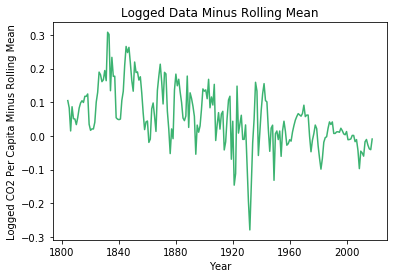

In [392]:
##EDIT

# Subtract rolling mean from log-transformed data
log_minus_rollmean = log_USA - roll_mean_log

# Drop null values
log_minus_rollmean.dropna(axis=0,inplace=True)

# Plot data
plt.plot(log_minus_rollmean, color='mediumseagreen')
plt.title('Logged Data Minus Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Logged CO2 Per Capita Minus Rolling Mean')

This data looks a lot more stationary. We will confirm with a Dickey-Fuller test.

In [20]:
# Dickey-Fuller test on logged data minus rolling mean
test = adfuller(log_minus_rollmean['co2_per_capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -5.439516
p-value                          0.000003
#Lags Used                       0.000000
Number of Observations Used    212.000000
dtype: float64

As expected, this Dickey-Fuller test yielded a very low p-value, indicating that we can confidently reject the null hypothesis that the data is non-stationary.

Even though this data is stationary and would likely work well in a time series model, the results of this model would not be interpretable in the context of our business problem. For our predictions to be useful, we need them to be in terms of CO2 emissions per capita in tonnes. Altering our data to this degree would make them uninterpretable for this purpose, and so we will not pursue a model on this data.

### Differencing

Now that we have produced a logged will now difference our original data until we achieve stationarity so we can model on both datasets.


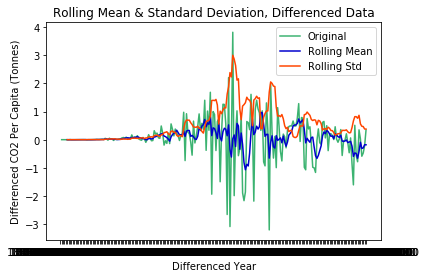

In [380]:
##EDIT

# Difference original df
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})

# Visualize differenced data, including 5-year rolling mean and standard deviation
roll_mean_diff = diff.rolling(window=5, center=False).mean()
roll_std_diff = diff.rolling(window=5, center=False).std()

plt.plot(diff,color='mediumseagreen', label='Original')
plt.plot(roll_mean_diff, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std_diff, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation, Differenced Data')
plt.xlabel('Differenced Year')
plt.ylabel('Differenced CO2 Per Capita (Tonnes)')
plt.show(block=False)



It is difficult to tell whether the differenced data is stationary based on the above data. We will check with a Dickey-Fuller test.

In [22]:
# Dickey-Fuller test on differenced data
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -4.055314
p-value                          0.001147
#Lags Used                      11.000000
Number of Observations Used    205.000000
dtype: float64

Based on the above p-value of 0.001, we see that we have achieved stationarity by differencing once. We will keep this in mind as we test d values in our ARIMA model below.

## Modeling

We will create time series models on both our logged data and original data to see which yields better results.

We decided to test our baseline models before splitting our data into train and test sets. The advantage of this decision was that we have more data to assess the overall model. A disadvantage is that our final model will be assessed specifically on how well it predicts our test data. To overcome this disadvantage, we will later tune our best model on the train-test-split data to produce a final model.



### Logged Data

**ACF and PACF for Logged Data**

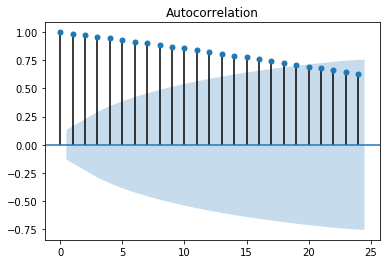

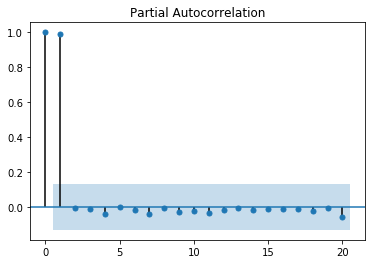

In [391]:
# ACF for logged data
plot_acf(log_USA[:-1], alpha=.05);

# PACF for logged data
plot_pacf(log_USA[:-1], alpha=.05, lags=20);

We can make the following observations about the ACF and PACF for our logged data:

1. This data displays an AR signature since the ACF diminishes gradually and the PACF cuts off sharply. This tells us we would expect to have at least one AR parameter.
2. When instantiating an ARIMA model, we would expect a relatively large number of MA terms due to the large number of significant ACF points and a relatively small number of AR terms due to the small number of significant PACF points.

**ARIMA Model for Logged Data**

We tried many different p, d, and q parameters for an ARIMA model on our logged data. The below paramters of p=2, d=0, q=0 yielded the best results.

In [25]:
# Instantiate ARIMA model for logged data

# Instantiate model
mod_log = ARIMA(log_USA[:-1], order=(2,0,0))

# Fit Model
mod_log_fit = mod_log.fit()

# Obeserve summary statistics
print(mod_log_fit.summary())


                              ARMA Model Results                              
Dep. Variable:         co2_per_capita   No. Observations:                  218
Model:                     ARMA(2, 0)   Log Likelihood                 240.613
Method:                       css-mle   S.D. of innovations              0.079
Date:                Fri, 29 Jan 2021   AIC                           -473.226
Time:                        16:19:44   BIC                           -459.688
Sample:                    01-01-1800   HQIC                          -467.758
                         - 01-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1865      2.927     -0.064      0.949      -5.924       5.551
ar.L1.co2_per_capita     1.1387      0.022     51.069      0.000       1.095       1.182
ar.L2.co2_pe

**AR Model for Logged Data**

Since our best ARIMA model ends up with d and q values of 0, we decided to try an AR model as well. We would expect this to have identical results to our ARIMA model with parameters (2,0,0).

In [26]:
# Instantiate an AR model
mod_logAR = ARMA(log_USA, order=(2,0))

# Fit model
logAR_fit = mod_logAR.fit()

# Observe summary statistics
print(logAR_fit.summary())

                              ARMA Model Results                              
Dep. Variable:         co2_per_capita   No. Observations:                  219
Model:                     ARMA(2, 0)   Log Likelihood                 242.188
Method:                       css-mle   S.D. of innovations              0.079
Date:                Fri, 29 Jan 2021   AIC                           -476.375
Time:                        16:20:40   BIC                           -462.819
Sample:                    01-01-1800   HQIC                          -470.900
                         - 01-01-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1740      2.940     -0.059      0.953      -5.936       5.588
ar.L1.co2_per_capita     1.1384      0.022     52.226      0.000       1.096       1.181
ar.L2.co2_pe

The above AR model has equal p-values but better AIC and BIC scores than our ARIMA model on the logged data. This is likely because of the way AIC and BIC are calculated, and we will further compare these two models later to determine which is best suited for our train-test-split data. Note that we tried several parameter combinations on the ARMA model and, as expected, parameters (2,0) yielded the best results.

### Original Data

We will now perform an ARIMA model on our original, non-logged data. We saw that this data needs to be differenced in order to achieve stationarity, so we expect to have a d value of at least 1 for our best model.

**ACF and PACF for Original Data**

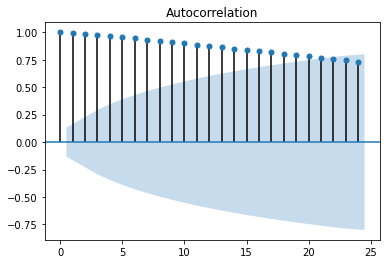

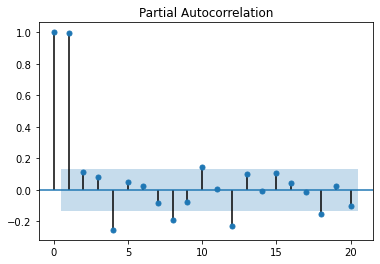

In [28]:
#ACF for original data
plot_acf(df_USA[:-1], alpha=.05);

#PACF for original data
plot_pacf(df_USA[:-1], alpha=.05, lags=20);

We can make the same two observations about the ACF and PACF for our original data as we did for our logged data:

1. This data displays an AR signature since the ACF diminishes gradually and the PACF cuts off sharply. This tells us we would expect to have at least one AR parameter.

2. When instantiating an ARIMA model, we would expect a relatively large number of MA terms due to the large number of significant ACF points and a relatively small number of AR terms due to the small number of significant PACF points.

**ARIMA Model for Original Data**

We tried many different p, d, and q parameters for an ARIMA model on our original data. The below three sets of paramters yielded the best results, which we will compare in more detail later.

In [30]:
# Instantiate model
mod123 = ARIMA(df_USA[:-1], order=(1,2,3))

# Fit model
mod123_fit = mod123.fit()

# Observe summary statistics
print(mod123_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -249.331
Method:                       css-mle   S.D. of innovations              0.761
Date:                Fri, 29 Jan 2021   AIC                            510.663
Time:                        16:42:57   BIC                            530.915
Sample:                    01-01-1802   HQIC                           518.845
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0006      0.001     -0.425      0.671      -0.003       0.002
ar.L1.D2.co2_per_capita    -0.7431      0.113     -6.549      0.000      -0.965      -0.521


In [31]:
# Instantiate model
mod420 = ARIMA(df_USA[:-1], order=(4,2,0))

# Fit model
mod420_fit = mod420.fit(disp=0)

# Observe summary statistics
print(mod420_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -264.456
Method:                       css-mle   S.D. of innovations              0.821
Date:                Fri, 29 Jan 2021   AIC                            540.912
Time:                        16:43:36   BIC                            561.164
Sample:                    01-01-1802   HQIC                           549.094
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.017     -0.088      0.930      -0.036       0.033
ar.L1.D2.co2_per_capita    -0.9221      0.067    -13.798      0.000      -1.053      -0.791


In [32]:
# Instantiate model
mod520 = ARIMA(df_USA[:-1], order=(5,2,0))

# Fit model
mod520_fit = mod520.fit(disp=0)

#Observe summary statistics
print(mod520_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -260.117
Method:                       css-mle   S.D. of innovations              0.804
Date:                Fri, 29 Jan 2021   AIC                            534.233
Time:                        16:44:02   BIC                            557.860
Sample:                    01-01-1802   HQIC                           543.778
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0014      0.014     -0.102      0.919      -0.029       0.026
ar.L1.D2.co2_per_capita    -0.9588      0.067    -14.395      0.000      -1.089      -0.828


**Stopped commenting here on 1/29**

# Determine Best Model

### RMSE 

#### Logged Data

In [393]:
#train test split (90%)

X = log_USA.index
y = log_USA['co2_per_capita']

train = log_USA.loc[:'1997-01-01']
test = log_USA.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2_per_capita'] , test['co2_per_capita']


In [394]:
# Instantiate and fit model to train data
mod_log = ARIMA(train[2:], order=(2,0,0)) # p,d,q
mod_log_fit = mod_log.fit()

# Prediction
pred_log = mod_log_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)


In [395]:
# Instantiate and fit model to train data
mod_logAR = ARMA(log_USA, order=(2,0))
logAR_fit = mod_logAR.fit()

# Prediction
pred_logAR = logAR_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)


#### Original Data

In [396]:
#Train test split (90%)
# diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})
# diff2 = diff.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})

X = df_USA.index
y = df_USA['co2_per_capita']

train = df_USA.loc[:'1997-01-01']
test = df_USA.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2_per_capita'] , test['co2_per_capita']


In [397]:
# 420 data
# Instantiate and fit model to train data
mod420 = ARIMA(y_train[2:], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit()

#Prediction
pred420 = mod420_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

In [398]:
# 520 data
# Instantiate and fit model to train data
mod520 = ARIMA(y_train[2:], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit()

#Prediction
pred520 = mod520_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

In [399]:
#Below model cannot run due to coefficients not being invertible

# # 123 data
# # Instantiate and fit model to train data
# mod123 = ARIMA(y_train[2:], order=(1,2,3)) # p,d,q
# mod123_fit = mod123.fit()

# #Prediction
# pred123 = mod123_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

#### testing metrics

In [400]:
def RMSE_reg(pred):
    return np.sqrt(((pred-y_test)**2).mean())

def RMSE_log(pred):
    return np.sqrt(((np.e**pred-y_test)**2).mean())

print('RMSE score for 4,2,0: ', RMSE_reg(pred420))
print('RMSE score for 5,2,0: ', RMSE_reg(pred520))
print('RMSE score for log: ', RMSE_log(pred_log))
print('RMSE score for logAR: ', RMSE_log(pred_logAR))


RMSE score for 4,2,0:  19.2044066099487
RMSE score for 5,2,0:  19.21005169843003
RMSE score for log:  2.2408462252368526
RMSE score for logAR:  0.5155279264711897


In [401]:
AIC_420 = mod420_fit.aic
AIC_520 = mod520_fit.aic
AIC_log = mod_log_fit.aic
AIC_logAR = logAR_fit.aic

print(AIC_420)
print(AIC_520)
print(AIC_log)
print(AIC_logAR)



501.3540340850692
495.07590996051266
-406.16819307435446
-476.3752088922788


In [402]:
##EDIT 
# Visualize predicted values for test set

# plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# plot observed values
ax = log_USA['1800-01-01':].plot(label='observed')

# plot predicted values
pred_log.plot(ax=ax, label='Forecast', alpha=0.9)

# # plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# set axes labels and title
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Logged Tonnes',size=12)
ax.set_title('Real vs Predicted for ARIMA with Logged Data', size=15)

plt.legend()
plt.show()

NameError: name 'rcParams' is not defined

In [ ]:
#Uncomment code below to see zoomed-in window of data only from 1950 onward

# # plot real vs predicted values along with confidence interval
# rcParams['figure.figsize'] = 15, 6

# # plot observed values
# ax = log_USA['1950-01-01':].plot(label='observed')

# # plot predicted values
# pred_log.plot(ax=ax, label='Forecast', alpha=0.9)

# # # plot the range for confidence intervals
# # ax.fill_between(pred_conf.index,
# #                 pred_conf.iloc[:, 0],
# #                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# # set axes labels and title
# ax.set_xlabel('Year', size=12)
# ax.set_ylabel('Logged Tonnes',size=12)
# ax.set_title('Real vs Predicted for ARIMA with Logged Data', size=15)

# plt.legend()
# plt.show()

### Try to Further Improve Logged Model

In [ ]:
# Train-Test split (90%)

X = log_USA.index
y = log_USA['co2_per_capita']

train2 = log_USA.loc[:'1997-01-01']
test2 = log_USA.loc['1997-01-01':]

X_train2, X_test2 = train2.index , test2.index
y_train2, y_test2 = train2['co2_per_capita'] , test2['co2_per_capita']


We tried new ARIMA parameters on the logged data given that the last paramters were determined without the train-test split. Below are the best parameters we encountered, which improved our data.

In [ ]:
# Instantiate and fit model to train data
mod_log2 = ARIMA(train2[2:], order=(2,0,2)) # p,d,q
mod_log2_fit = mod_log2.fit()

# Prediction
pred_log2 = mod_log2_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

print('RMSE score for original log model: ', RMSE(pred_log))
print('AIC for original log model:', mod_log_fit.aic)

print('RMSE score for new log model: ', RMSE(pred_log2))
print('AIC for new log model:', mod_log2_fit.aic)

In [ ]:
# plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# plot observed values
ax = log_USA['1800-01-01':].plot(label='observed')

# plot predicted values
pred_log2.plot(ax=ax, label='Forecast', alpha=0.9)

# # plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# set axes labels and title
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Logged Tonnes',size=12)
ax.set_title('Real vs Predicted for ARIMA with Logged Data', size=15)

plt.legend()
plt.show()

In [ ]:
#Uncomment code below to see zoomed-in window of data only from 1950 onward

# # plot real vs predicted values along with confidence interval
# rcParams['figure.figsize'] = 15, 6

# # plot observed values
# ax = log_USA['1950-01-01':].plot(label='observed')

# # plot predicted values
# pred_log2.plot(ax=ax, label='Forecast', alpha=0.9)

# # # plot the range for confidence intervals
# # ax.fill_between(pred_conf.index,
# #                 pred_conf.iloc[:, 0],
# #                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# # set axes labels and title
# ax.set_xlabel('Year', size=12)
# ax.set_ylabel('Logged Tonnes',size=12)
# ax.set_title('Real vs Predicted for ARIMA with Logged Data', size=15)

# plt.legend()
# plt.show()

### Exploring best model

In [ ]:
# Visualize residuals/error
residuals = pd.DataFrame(mod_log2_fit.resid)
residuals.plot()
pyplot.show();


In [ ]:
# Check for linearity
residuals = pd.DataFrame(mod_log2_fit.resid)
residuals.plot(kind='kde')
pyplot.show()


In [ ]:
# Visualize prediction
mod_log2_fit.plot_predict();

In [ ]:
mod_log2_fit.forecast()[0] # 0 indicates the very next value the model predicts??


In [ ]:
# Convert logged prediction back to original units to compare directly to original data

e = 2.71828
pred_correctunits = e**(pred_log2)

# plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# plot observed values
ax = df_USA['1800-01-01':].plot(label='observed')

# plot predicted values
pred_correctunits.plot(ax=ax, label='Forecast', alpha=0.9)

# # plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# set axes labels and title
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Tonnes',size=12)
ax.set_title('Real vs Predicted for ARIMA in Tonnes', size=15)

plt.legend()
plt.show()

In [ ]:
# Look at RMSE and AIC in new units
print('RMSE score for original log model: ', RMSE(pred_correctunits))
print('AIC for original log model:', mod_log2_fit.aic)

### Prediction

In [ ]:
from matplotlib.pylab import rcParams

In [ ]:
#from statsmodels.tsa.arima_model import ARMA

In [ ]:
# pred = log_mod_fit.get_prediction(start='1998-01-01', dynamic=False)


In [ ]:
# pred_conf = pred_log.conf_int()

In [ ]:
# pred_log.predicted_mean

In [ ]:
# Get the real and predicted values
CO2_forecasted = pred_log.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
## DYNAMIC FORECASTING
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

### Trying to improve the log model

In [ ]:
e = 2.71828
pred_correctunits = e**(pred_log2)

# plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# plot observed values
ax = df_USA['1800-01-01':].plot(label='observed')

# plot predicted values
pred_correctunits.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# # plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# set axes labels and title
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Crime Levels',size=12)
ax.set_title('Real vs Predicted for ARIMA in Tonnes', size=15)

plt.legend()
plt.show()

# Additional Notes

In [ ]:
y_test.diff(1)

#### Testing out Auto ARIMA and gridsearch

In [ ]:
# diff.dropna(inplace=True)
# diff

In [ ]:
# train = diff.loc[:'1997-01-01'] #data before 1997
# valid = diff.loc['1997-01-01':] #data after 1997

# #plotting the data
# train.plot()
# valid.plot()

In [ ]:
#! pip install pyramid-arima

In [ ]:
#from pyramid.arima import auto_arima

In [ ]:
# #building the model
# from pyramid.arima import auto_arima
# model = auto_arima(train, 
#                    trace=True, 
#                    error_action='ignore', 
#                    suppress_warnings=True)
# model.fit(train)

# forecast = model.predict(n_periods=len(valid))
# forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

# #plot the predictions for validation set
# plt.plot(train, label='Train')
# plt.plot(valid, label='Valid')
# plt.plot(forecast, label='Prediction')
# plt.show()

In [ ]:
# Source link: https://github.com/learn-co-curriculum/dsc-sarima-models-lab/tree/solution


In [ ]:
# import itertools

# # Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 5)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))

In [ ]:
# import statsmodels.api as sm

# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# ans = []
# for comb in pdq:
#     try:
#         mod = sm.tsa.statespace.ARIMA(df_USA,
#                                         order=comb,
#                                         seasonal_order=combs,
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)

#         output = mod.fit()
#         ans.append([comb, combs, output.aic])
#         print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
#     except:
#         continue

In [ ]:
# import statsmodels.api as sm

# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# ans = []
# for comb in pdq:
#     try:
#         mod = sm.tsa.arima.model.ARIMA(df_USA,
#                                         order=comb,
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)

#         output = mod.fit()
#         ans.append([comb, combs, output.aic])
#         print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
#     except:
#         continue

In [ ]:
# # Find the parameters with minimal AIC value
# ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
# # define the p, d and q parameters to take any value between 0 and 2
# p = q = d range(1, 6)

# # generate all different combinations of p, q and q triplets
# pqd = list(itertools.product(p, d, q))

In [ ]:
# # run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# ans = []
# for comb in pqd:
#     try:
#         mod = ARMA(y_train, order=comb)
#         output = mod.fit()
#         ans.append([comb, output.aic])
#         print('ARMA {} : AIC Calculated ={}'.format(comb,output.aic))
#     except:
#         continue

**Tuesday**

-Initial time series model (check for stationarity/trends, fix if not)--top 10 countries (not per capita)

-Vizualizations for top 10 countries per capita

**Wednesday**

-Fix whatever needs fixing

-Other EDA/visualizations

-Tune final model

**Thursday**

-Tune final model (if not done by Wed)

-Create Read Me, PPT presentation

-Clean up code

-Practice presentation

**Stretch Goals**

-Research peaks and valleys historically

-Compare to world emissions
